In [1]:
# Example of file for charm stocastics
import uproot
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Delta_Phi(phi1, phi2):
    pi = 3.14159265358979323846
    dphi = abs(phi1 - phi2)
    return np.where(dphi > pi, 2*pi - dphi, dphi)
def Delta_R(phi1, eta1, phi2, eta2):
    dphi = Delta_Phi(phi1,phi2)
    deta = abs( eta1 - eta2 )
    return pow( dphi*dphi + deta*deta, 0.5 )

In [3]:
# Here below we are just reading the csv file
dfcharm = pd.read_csv("input/EventData_ptmin4.csv")

#with the command below you can inspect the columns of the dataframe
dfcharm.columns

Index(['cLO_pT', 'cLO_phi', 'cLO_eta', 'c_pT', 'c_phi', 'c_eta', 'D_pT',
       'D_phi', 'D_eta', 'cbarLO_pT', 'cbarLO_phi', 'cbarLO_eta', 'cbar_pT',
       'cbar_phi', 'cbar_eta', 'Dbar_pT', 'Dbar_phi', 'Dbar_eta', 'Kpl_pT',
       'Kpl_phi', 'Kpl_eta', 'Kmi_pT', 'Kmi_phi', 'Kmi_eta', 'pipl_pT',
       'pipl_phi', 'pipl_eta', 'pimi_pT', 'pimi_phi', 'pimi_eta',
       'multiplicity', 'D_cone_mult', 'D_ptcone', 'Dbar_cone_mult',
       'Dbar_ptcone'],
      dtype='object')

In [4]:
#Build new columns in the dataframe
#momentum ratios of c to cbar at LO, Hadronisation and Confinement
dfcharm["D_ptratio"] = dfcharm["D_pT"]/dfcharm["Dbar_pT"]
dfcharm["c_ptratio"] = dfcharm["c_pT"]/dfcharm["cbar_pT"]
dfcharm["cLO_ptratio"] = dfcharm["cLO_pT"]/dfcharm["cbarLO_pT"]
#fragmentation functions for c and cbar
dfcharm["FFc"] = dfcharm["D_pT"]/dfcharm["D_ptcone"]
dfcharm["FFcbar"] = dfcharm["Dbar_pT"]/dfcharm["Dbar_ptcone"]
#pseudorapidity separation of ccbar pair at LO, Hadronisation and Confinement
dfcharm["deta_DD"] = abs( dfcharm["D_eta"] - dfcharm["Dbar_eta"] )
dfcharm["deta_cc"] = abs( dfcharm["c_eta"] - dfcharm["cbar_eta"] )
dfcharm["deta_ccLO"] = abs( dfcharm["cLO_eta"] - dfcharm["cbarLO_eta"] )
#pseudorapidity separation of c-quark and respective D0 meson
dfcharm["deta_cD"] = abs( dfcharm["c_eta"] - dfcharm["D_eta"] )
dfcharm["deta_cDbar"] = abs( dfcharm["cbar_eta"] - dfcharm["Dbar_eta"] )
#angular separation of ccbar pair at LO, Hadronisation and confinement
dfcharm["dphi_DD"] = Delta_Phi(dfcharm["D_phi"], dfcharm["Dbar_phi"]) 
dfcharm["dphi_cc"] = Delta_Phi(dfcharm["c_phi"], dfcharm["cbar_phi"])
dfcharm["dphi_ccLO"] = Delta_Phi(dfcharm["cLO_phi"], dfcharm["cbarLO_phi"])
#angular separation of c-quark and respective D0 meson
dfcharm["dphi_cD"] = Delta_Phi(dfcharm["c_phi"], dfcharm["D_phi"])
dfcharm["dphi_cDbar"] = Delta_Phi(dfcharm["cbar_phi"], dfcharm["Dbar_phi"])
#angular distance of daughter particles to their D-meson mother
dfcharm["dR_DK"] = Delta_R(dfcharm["D_phi"],dfcharm["D_eta"],dfcharm["Kmi_phi"],dfcharm["Kmi_eta"])
dfcharm["dR_Dpi"] = Delta_R(dfcharm["D_phi"],dfcharm["D_eta"],dfcharm["pipl_phi"],dfcharm["pipl_eta"])
dfcharm["dR_DbarK"] = Delta_R(dfcharm["Dbar_phi"],dfcharm["Dbar_eta"],dfcharm["Kpl_phi"],dfcharm["Kpl_eta"])
dfcharm["dR_Dbarpi"] = Delta_R(dfcharm["Dbar_phi"],dfcharm["Dbar_eta"],dfcharm["pimi_phi"],dfcharm["pimi_eta"])

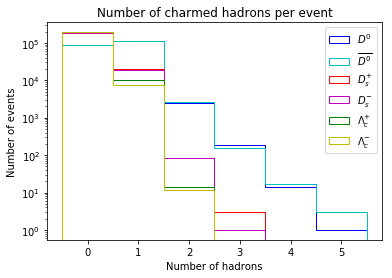

In [5]:
#plot number of charmed hadrons per event
dfnmes = pd.read_csv("input/NDs_multData.csv")

plt.hist(dfnmes["num_D"], bins = 6, range = [-0.5,5.5], label = '$D^0$', histtype = "step", fill = False, color='b')
plt.hist(dfnmes["num_Dbar"], bins = 6, range = [-0.5,5.5], label = '$\overline{D^0}$', histtype = "step", fill = False, color='c')
plt.hist(dfnmes["num_Ds"], bins = 6, range = [-0.5,5.5], label = '$D^{+}_s$', histtype = "step", fill = False, color='r')
plt.hist(dfnmes["num_Dsbar"], bins = 6, range = [-0.5,5.5], label = '$D^{-}_s$', histtype = "step", fill = False, color='m')
plt.hist(dfnmes["num_lambdac"], bins = 6, range = [-0.5,5.5], label = '$\Lambda^{+}_c$', histtype = "step", fill = False, color='g')
plt.hist(dfnmes["num_lambdacbar"], bins = 6, range = [-0.5,5.5], label = '$\Lambda^{-}_c$', histtype = "step", fill = False, color='y')
plt.yscale("log")
plt.title("Number of charmed hadrons per event")
plt.xlabel("Number of hadrons")
plt.ylabel("Number of events")
plt.legend()

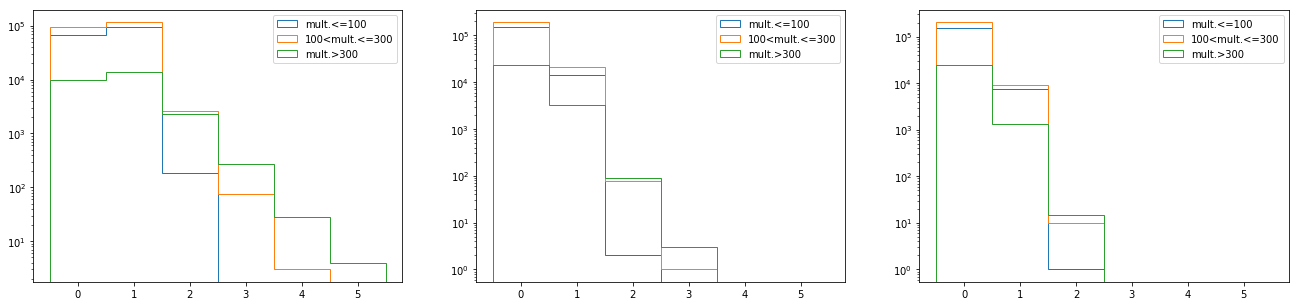

In [6]:
#Number of charmed hadrons for low, mid and high multiplicity
nD0_bin1 = []
nD0_bin2 = []
nD0_bin3 = []
nDs_bin1 = []
nDs_bin2 = []
nDs_bin3 = []
nLc_bin1 = []
nLc_bin2 = []
nLc_bin3 = []

dfnmes["mult0-100"] = np.where(dfnmes["multiplicity"] <= 100, True, False)
dfnmes["mult100-300"] = np.logical_and( np.greater(dfnmes["multiplicity"], 100), np.less_equal(dfnmes["multiplicity"], 300))
dfnmes["mult300plus"] = np.where(dfnmes["multiplicity"] > 300, True, False)

for i in range(len(dfnmes["mult0-100"])):
    if dfnmes.loc[i,"mult0-100"] :
        nD0_bin1.append(dfnmes.loc[i,"num_D"])
        nD0_bin1.append(dfnmes.loc[i,"num_Dbar"])
        nDs_bin1.append(dfnmes.loc[i,"num_Ds"])
        nDs_bin1.append(dfnmes.loc[i,"num_Dsbar"])
        nLc_bin1.append(dfnmes.loc[i,"num_lambdac"])
        nLc_bin1.append(dfnmes.loc[i,"num_lambdacbar"])
    elif dfnmes.loc[i,"mult100-300"] :
        nD0_bin2.append(dfnmes.loc[i,"num_D"])
        nD0_bin2.append(dfnmes.loc[i,"num_Dbar"])
        nDs_bin2.append(dfnmes.loc[i,"num_Ds"])
        nDs_bin2.append(dfnmes.loc[i,"num_Dsbar"])
        nLc_bin2.append(dfnmes.loc[i,"num_lambdac"])
        nLc_bin2.append(dfnmes.loc[i,"num_lambdacbar"])
    elif dfnmes.loc[i,"mult300plus"] :
        nD0_bin3.append(dfnmes.loc[i,"num_D"])
        nD0_bin3.append(dfnmes.loc[i,"num_Dbar"])
        nDs_bin3.append(dfnmes.loc[i,"num_Ds"])
        nDs_bin3.append(dfnmes.loc[i,"num_Dsbar"])
        nLc_bin3.append(dfnmes.loc[i,"num_lambdac"])
        nLc_bin3.append(dfnmes.loc[i,"num_lambdacbar"])

fig, axes = plt.subplots(1,3, figsize=(22.5,5))
axes[0].hist(nD0_bin1, range = [-0.5,5.5], bins = 6, label = 'mult.<=100', histtype = 'step', fill = False)
axes[0].hist(nD0_bin2, range = [-0.5,5.5], bins = 6, label = '100<mult.<=300', histtype = 'step', fill = False)
axes[0].hist(nD0_bin3, range = [-0.5,5.5], bins = 6, label = 'mult.>300', histtype = 'step', fill = False)
axes[0].set_yscale("log")
axes[0].legend()

axes[1].hist(nDs_bin1, range = [-0.5,5.5], bins = 6, label = 'mult.<=100', histtype = 'step', fill = False)
axes[1].hist(nDs_bin2, range = [-0.5,5.5], bins = 6, label = '100<mult.<=300', histtype = 'step', fill = False)
axes[1].hist(nDs_bin3, range = [-0.5,5.5], bins = 6, label = 'mult.>300', histtype = 'step', fill = False)
axes[1].set_yscale("log")
axes[1].legend()

axes[2].hist(nLc_bin1, range = [-0.5,5.5], bins = 6, label = 'mult.<=100', histtype = 'step', fill = False)
axes[2].hist(nLc_bin2, range = [-0.5,5.5], bins = 6, label = '100<mult.<=300', histtype = 'step', fill = False)
axes[2].hist(nLc_bin3, range = [-0.5,5.5], bins = 6, label = 'mult.>300', histtype = 'step', fill = False)
axes[2].set_yscale("log")
axes[2].legend()

Text(0.5, 1.0, 'Number of $\\Lambda^{-}_c$ vs event multiplicity')

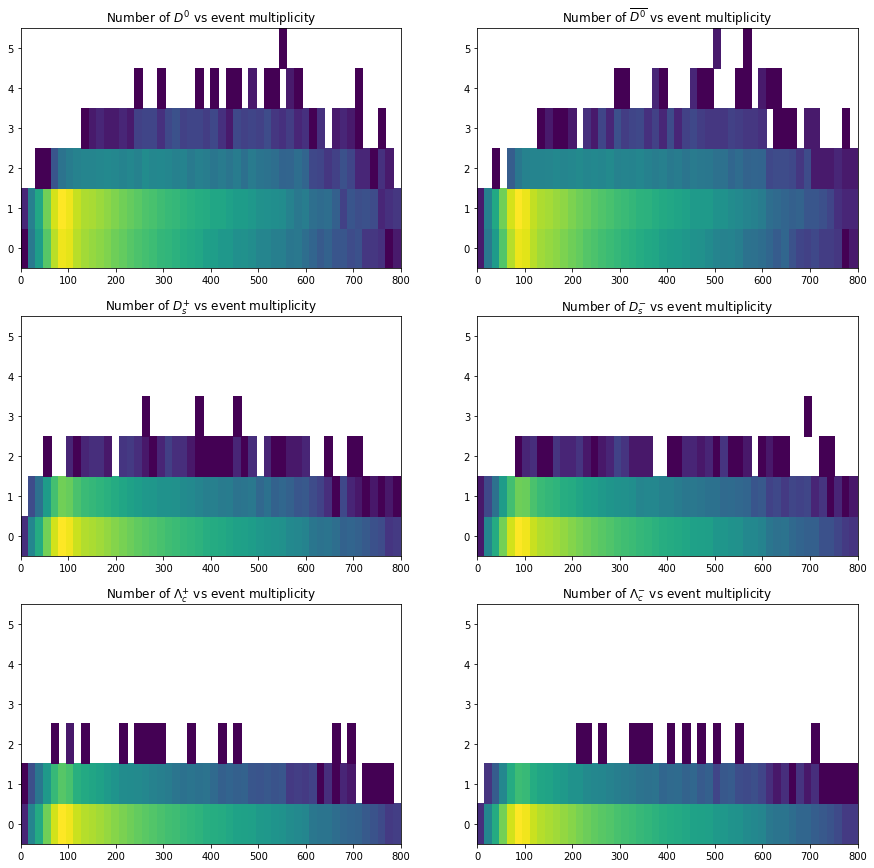

In [7]:
fig, axes = plt.subplots(3,2, figsize=(15,15))

axes[0,0].hist2d(dfnmes["multiplicity"],dfnmes["num_D"], bins = [50,6], range = [[0,800],[-0.5,5.5]], norm=mpl.colors.LogNorm())
axes[0,1].hist2d(dfnmes["multiplicity"],dfnmes["num_Dbar"], bins = [50,6], range = [[0,800],[-0.5,5.5]], norm=mpl.colors.LogNorm())
axes[1,0].hist2d(dfnmes["multiplicity"],dfnmes["num_Ds"], bins = [50,6], range = [[0,800],[-0.5,5.5]], norm=mpl.colors.LogNorm())
axes[1,1].hist2d(dfnmes["multiplicity"],dfnmes["num_Dsbar"], bins = [50,6], range = [[0,800],[-0.5,5.5]], norm=mpl.colors.LogNorm())
axes[2,0].hist2d(dfnmes["multiplicity"],dfnmes["num_lambdac"], bins = [50,6], range = [[0,800],[-0.5,5.5]], norm=mpl.colors.LogNorm())
axes[2,1].hist2d(dfnmes["multiplicity"],dfnmes["num_lambdacbar"], bins = [50,6], range = [[0,800],[-0.5,5.5]], norm=mpl.colors.LogNorm())

axes[0,0].set_title("Number of $D^0$ vs event multiplicity")
axes[0,1].set_title("Number of $\overline{D^0}$ vs event multiplicity")
axes[1,0].set_title("Number of $D^{+}_s$ vs event multiplicity")
axes[1,1].set_title("Number of $D^{-}_s$ vs event multiplicity")
axes[2,0].set_title("Number of $\Lambda^{+}_c$ vs event multiplicity")
axes[2,1].set_title("Number of $\Lambda^{-}_c$ vs event multiplicity")



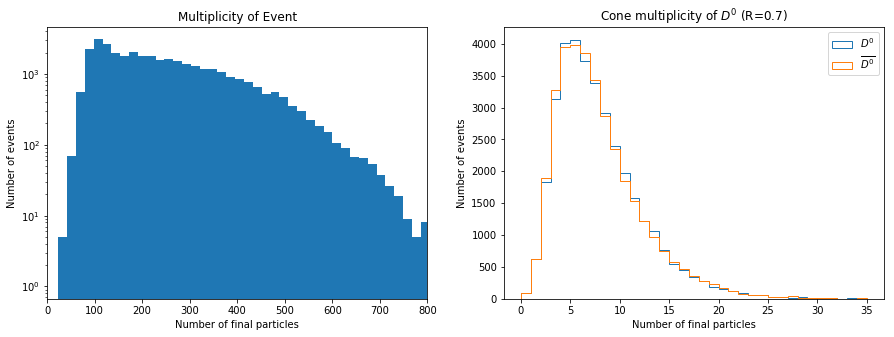

In [8]:
#multiplicity plots
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_yscale("log")
axes[0].set_title("Multiplicity of Event")
axes[0].set_xlabel("Number of final particles")
axes[0].set_ylabel("Number of events")
axes[0].hist(dfcharm["multiplicity"], bins=50)
axes[0].set_xlim([0,800])

axes[1].set_title("Cone multiplicity of $D^0$ (R=0.7)")
axes[1].set_xlabel("Number of final particles")
axes[1].set_ylabel("Number of events")
axes[1].hist(dfcharm["D_cone_mult"],bins=35, range = [0,35], label = '$D^0$',histtype = "step", fill = False)
axes[1].hist(dfcharm["Dbar_cone_mult"],bins=35, range = [0,35], label = '$\overline{D^0}$',histtype = "step", fill = False)
axes[1].legend()



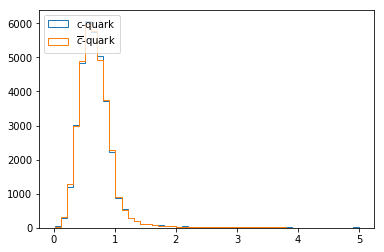

In [9]:
#Fragmentation functions for c and cbar
#plt.xscale("log")
plt.hist(dfcharm["FFc"], bins=50, range = [0.01,5], label = "c-quark", histtype = "step", fill = False)
plt.hist(dfcharm["FFcbar"], bins=50, range = [0.01,5], label = '$\overline{c}$-quark', histtype = "step", fill = False)
plt.legend(loc = 'upper left')

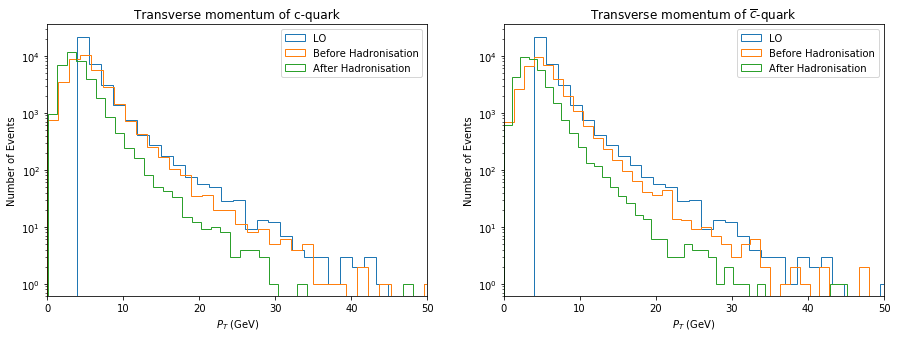

In [10]:
#pT of charm states
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_yscale("log")
axes[0].set_xlim([0,50])
axes[0].set_title("Transverse momentum of c-quark")
axes[0].set_xlabel(r'$P_T$ (GeV)')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dfcharm["cLO_pT"], bins=50, label = "LO", histtype = "step", fill = False)
axes[0].hist(dfcharm["c_pT"], bins=50, label = "Before Hadronisation", histtype = "step", fill = False)
axes[0].hist(dfcharm["D_pT"], bins=50, label = "After Hadronisation", histtype = "step", fill = False)
axes[0].legend()

#pT of cbar states
axes[1].set_yscale("log")
axes[1].set_xlim([0,50])
axes[1].set_title(r'Transverse momentum of $\overline{c}$-quark')
axes[1].set_xlabel(r'$P_T$ (GeV)')
axes[1].set_ylabel('Number of Events')
axes[1].hist(dfcharm["cbarLO_pT"], bins=50, label = "LO", histtype = "step", fill = False)
axes[1].hist(dfcharm["cbar_pT"], bins=50, label = "Before Hadronisation", histtype = "step", fill = False)
axes[1].hist(dfcharm["Dbar_pT"], bins=50, label = "After Hadronisation", histtype = "step", fill = False)
axes[1].legend()

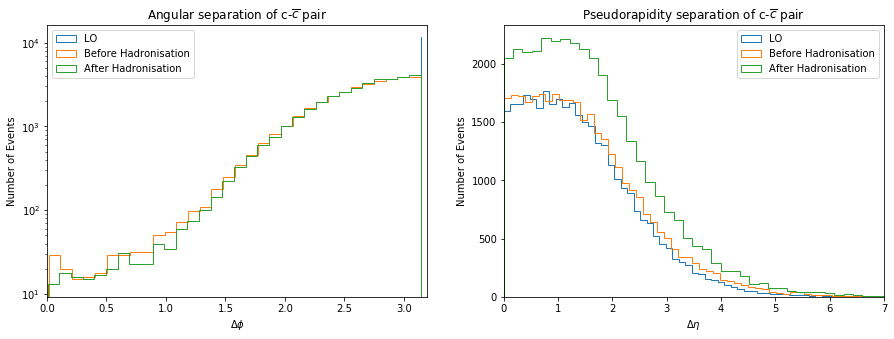

In [11]:
#angular separation of ccbar pair
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_yscale("log")
axes[0].set_xlim([0,3.2])
axes[0].set_title(r'Angular separation of c-$\overline{c}$ pair')
axes[0].set_xlabel(r'$\Delta\phi$')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dfcharm["dphi_ccLO"], bins=32, label = "LO", histtype = "step", fill = False)
axes[0].hist(dfcharm["dphi_cc"], bins=32, label = "Before Hadronisation", histtype = "step", fill = False)
axes[0].hist(dfcharm["dphi_DD"], bins=32, label = "After Hadronisation", histtype = "step", fill = False)
axes[0].legend()

axes[1].set_xlim([0,7])
axes[1].set_title(r'Pseudorapidity separation of c-$\overline{c}$ pair')
axes[1].set_xlabel(r'$\Delta\eta$')
axes[1].set_ylabel('Number of Events')
axes[1].hist(dfcharm["deta_ccLO"], bins=70, label = "LO", histtype = "step", fill = False)
axes[1].hist(dfcharm["deta_cc"], bins=70, label = "Before Hadronisation", histtype = "step", fill = False)
axes[1].hist(dfcharm["deta_DD"], bins=70, label = "After Hadronisation", histtype = "step", fill = False)
axes[1].legend()

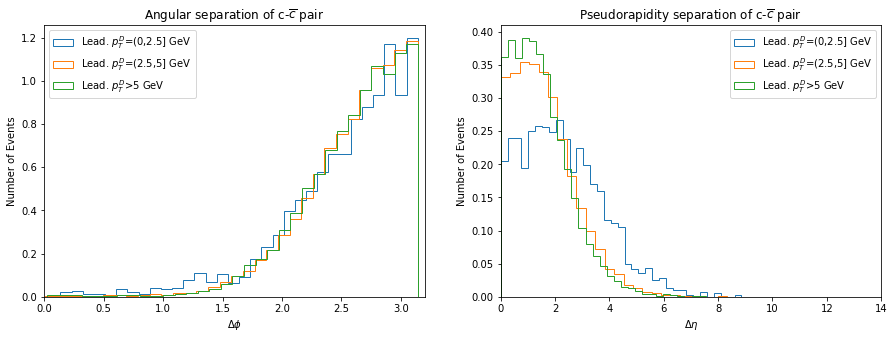

In [12]:
#plot delta phi and delta eta in bins of pt
#Organise in bins of leading D meson pT. Try (0-2.5],(2.5,5],(>5) GeV
dfcharm["LeadingD_pT"] = dfcharm[["D_pT","Dbar_pT"]].max(axis=1)
dfcharm["pT0to2.5"] = np.where( dfcharm["LeadingD_pT"] <= 2.5, True, False)
dfcharm["pT2.5to5"] = np.logical_and( np.greater(dfcharm["LeadingD_pT"], 2.5), np.less_equal(dfcharm["LeadingD_pT"], 5))
dfcharm["pT5plus"] = np.where( dfcharm["LeadingD_pT"] > 5, True, False)

dphi_bin1 = []
dphi_bin2 = []
dphi_bin3 = []
deta_bin1 = []
deta_bin2 = []
deta_bin3 = []
#loop over column and create lists of data that passes bin selection
for i in range(len(dfcharm["dphi_DD"])):
    if dfcharm.loc[i,"pT0to2.5"] : 
        dphi_bin1.append(dfcharm.loc[i,"dphi_DD"])
        deta_bin1.append(dfcharm.loc[i,"deta_DD"])
    elif dfcharm.loc[i,"pT2.5to5"] : 
        dphi_bin2.append(dfcharm.loc[i,"dphi_DD"])
        deta_bin2.append(dfcharm.loc[i,"deta_DD"])
    elif dfcharm.loc[i,"pT5plus"] : 
        dphi_bin3.append(dfcharm.loc[i,"dphi_DD"])
        deta_bin3.append(dfcharm.loc[i,"deta_DD"])

#plot histograms
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_xlim([0,3.2])
axes[0].set_title(r'Angular separation of c-$\overline{c}$ pair')
axes[0].set_xlabel(r'$\Delta\phi$')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dphi_bin1, bins=32, label='Lead. $p_{T}^{D}$=(0,2.5] GeV', histtype="step", fill = False, density = True)
axes[0].hist(dphi_bin2, bins=32, label='Lead. $p_{T}^{D}$=(2.5,5] GeV', histtype="step", fill = False, density = True)
axes[0].hist(dphi_bin3, bins=32, label='Lead. $p_{T}^{D}$>5 GeV', histtype="step", fill = False, density = True)
axes[0].legend(loc="upper left")

axes[1].set_xlim([0,14])
axes[1].set_title(r'Pseudorapidity separation of c-$\overline{c}$ pair')
axes[1].set_xlabel(r'$\Delta\eta$')
axes[1].set_ylabel('Number of Events')
axes[1].hist(deta_bin1, bins=35, label='Lead. $p_{T}^{D}$=(0,2.5] GeV', histtype="step", fill = False, density = True)
axes[1].hist(deta_bin2, bins=35, label='Lead. $p_{T}^{D}$=(2.5,5] GeV', histtype="step", fill = False, density = True)
axes[1].hist(deta_bin3, bins=35, label='Lead. $p_{T}^{D}$>5 GeV', histtype="step", fill = False, density = True)
axes[1].legend()

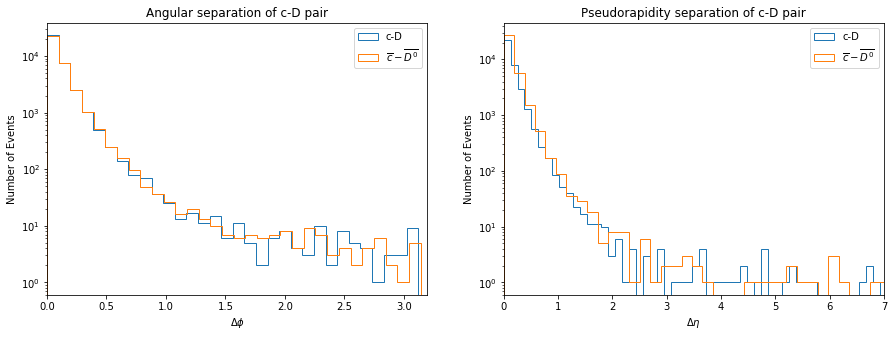

In [13]:
#Angular and pseudorapidity of c-D pairs
fig, axes = plt.subplots(1,2, figsize=(15,5))

#angular separation of c-D
axes[0].set_yscale("log")
axes[0].set_xlim([0,3.2])
axes[0].set_title(r'Angular separation of c-D pair')
axes[0].set_xlabel(r'$\Delta\phi$')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dfcharm["dphi_cD"], bins=32, label = "c-D", histtype = "step", fill = False)
axes[0].hist(dfcharm["dphi_cDbar"], bins=32, label = '$\overline{c}-\overline{D^0}$', histtype = "step", fill = False)
axes[0].legend()

#pseudorapidity separation of c-D
axes[1].set_yscale("log")
axes[1].set_xlim([0,7])
axes[1].set_title(r'Pseudorapidity separation of c-D pair')
axes[1].set_xlabel(r'$\Delta\eta$')
axes[1].set_ylabel('Number of Events')
axes[1].hist(dfcharm["deta_cD"], bins=70, label = "c-D", histtype = "step", fill = False)
axes[1].hist(dfcharm["deta_cDbar"], bins=70, label = '$\overline{c}-\overline{D^0}$', histtype = "step", fill = False)
axes[1].legend()

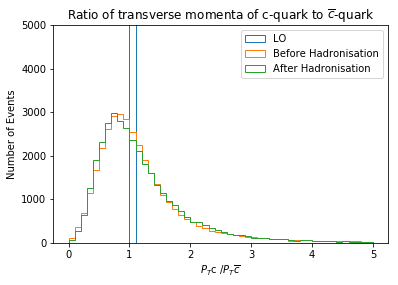

In [14]:
#pt ratio c to cbar

plt.title(r'Ratio of transverse momenta of c-quark to $\overline{c}$-quark')
plt.xlabel(r'$P_T$c /$P_T\overline{c}$')
plt.ylabel('Number of Events')
plt.ylim([0,5000])
plt.hist(dfcharm["cLO_ptratio"], bins=50, range = [0,5], label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["c_ptratio"], bins=50, range = [0,5], label = "Before Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["D_ptratio"], bins=50, range = [0,5], label = "After Hadronisation", histtype = "step", fill = False)
plt.legend()

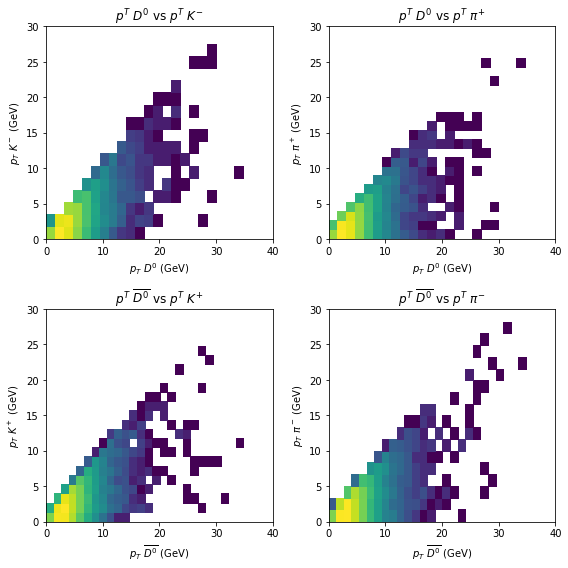

In [15]:
#pt of D-meson vs daughter particle pts
fig, axes = plt.subplots(2,2, figsize=(8,8))
#pT D0 vs pt K-
axes[0,0].set_title('$p^T$ $D^{0}$ vs $p^T$ $K^{-}$')
axes[0,0].set_xlabel(r'$p_T$ $D^0$ (GeV)')
axes[0,0].set_ylabel(r'$p_T$ $K^-$ (GeV)')
axes[0,0].hist2d(dfcharm["D_pT"],dfcharm["Kmi_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
axes[0,0].set_xlim([0,40])
axes[0,0].set_ylim([0,30])
#pT D0 vs pt pi+
axes[0,1].set_title('$p^T$ $D^{0}$ vs $p^T$ $\pi^{+}$')
axes[0,1].set_xlabel(r'$p_T$ $D^0$ (GeV)')
axes[0,1].set_ylabel(r'$p_T$ $\pi^+$ (GeV)')
axes[0,1].hist2d(dfcharm["D_pT"],dfcharm["pipl_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
axes[0,1].set_xlim([0,40])
axes[0,1].set_ylim([0,30])
#pT D0bar vs pt K+
axes[1,0].set_title('$p^T$ $\overline{D^{0}}$ vs $p^T$ $K^{+}$')
axes[1,0].set_xlabel(r'$p_T$ $\overline{D^0}$ (GeV)')
axes[1,0].set_ylabel(r'$p_T$ $K^+$ (GeV)')
axes[1,0].hist2d(dfcharm["Dbar_pT"],dfcharm["Kpl_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
axes[1,0].set_xlim([0,40])
axes[1,0].set_ylim([0,30])
#pT D0bar vs pt pi-
axes[1,1].set_title('$p^T$ $\overline{D^{0}}$ vs $p^T$ $\pi^{-}$')
axes[1,1].set_xlabel(r'$p_T$ $\overline{D^0}$ (GeV)')
axes[1,1].set_ylabel(r'$p_T$ $\pi^-$ (GeV)')
axes[1,1].hist2d(dfcharm["Dbar_pT"],dfcharm["pimi_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
axes[1,1].set_xlim([0,40])
axes[1,1].set_ylim([0,30])

plt.tight_layout()


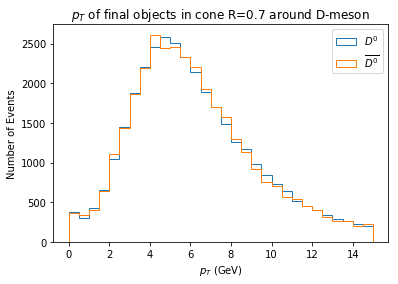

In [16]:
#ptcone plots
plt.hist(dfcharm["D_ptcone"], bins=30, range = [0,15], label = '$D^0$', histtype = "step", fill = False)
plt.hist(dfcharm["Dbar_ptcone"], bins=30, range = [0,15], label = '$\overline{D^0}$', histtype = "step", fill = False)
plt.title("$p_T$ of final objects in cone R=0.7 around D-meson")
plt.xlabel("$p_T$ (GeV)")
plt.ylabel("Number of Events")
plt.legend()

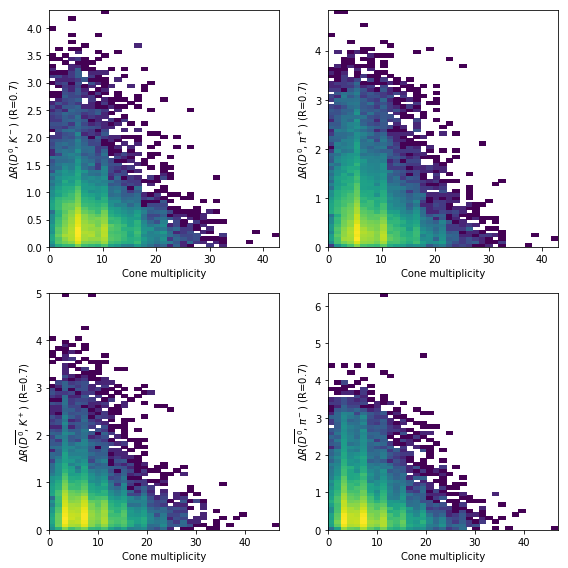

In [17]:
#2D histograms of angular distance from D meson to daughters as function of cone multiplicity
fig, axes = plt.subplots(2,2, figsize=(8,8))

axes[0,0].hist2d(dfcharm["D_cone_mult"], dfcharm["dR_DK"], bins = [35,70], norm=mpl.colors.LogNorm())
axes[0,0].set_xlabel('Cone multiplicity')
axes[0,0].set_ylabel('$\Delta R(D^0,K^-)$ (R=0.7)')

axes[0,1].hist2d(dfcharm["D_cone_mult"], dfcharm["dR_Dpi"], bins = [35,70], norm=mpl.colors.LogNorm())
axes[0,1].set_xlabel('Cone multiplicity')
axes[0,1].set_ylabel('$\Delta R(D^0,\pi^+)$ (R=0.7)')

axes[1,0].hist2d(dfcharm["Dbar_cone_mult"], dfcharm["dR_DbarK"], bins = [35,70], norm=mpl.colors.LogNorm())
axes[1,0].set_xlabel('Cone multiplicity')
axes[1,0].set_ylabel('$\Delta R(\overline{D^0},K^+)$ (R=0.7)')

axes[1,1].hist2d(dfcharm["Dbar_cone_mult"], dfcharm["dR_Dbarpi"], bins = [35,70], norm=mpl.colors.LogNorm())
axes[1,1].set_xlabel('Cone multiplicity')
axes[1,1].set_ylabel('$\Delta R(\overline{D^0},\pi^-)$ (R=0.7)')

plt.tight_layout()




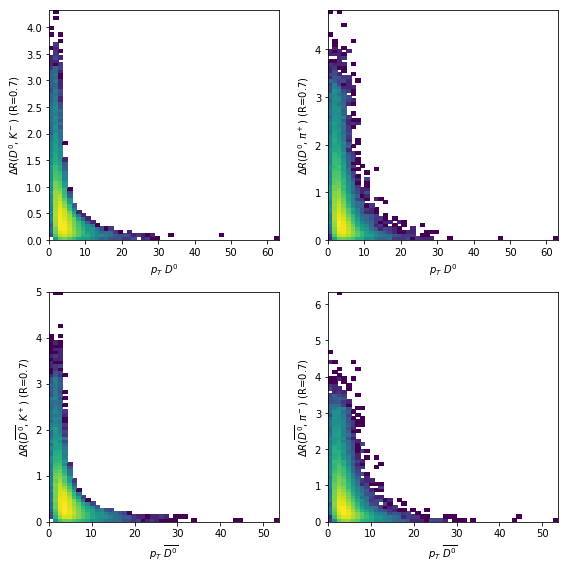

In [18]:
#2D histograms of angular distance from D meson to daughters as function of transverse momentum of D
fig, axes = plt.subplots(2,2,figsize=(8,8))

axes[0,0].hist2d(dfcharm["D_pT"], dfcharm["dR_DK"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[0,0].set_xlabel('$p_T$ $D^0$')
axes[0,0].set_ylabel('$\Delta R(D^0,K^-)$ (R=0.7)')

axes[0,1].hist2d(dfcharm["D_pT"], dfcharm["dR_Dpi"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[0,1].set_xlabel('$p_T$ $D^0$')
axes[0,1].set_ylabel('$\Delta R(D^0,\pi^+)$ (R=0.7)')

axes[1,0].hist2d(dfcharm["Dbar_pT"], dfcharm["dR_DbarK"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[1,0].set_xlabel('$p_T$ $\overline{D^0}$')
axes[1,0].set_ylabel('$\Delta R(\overline{D^0},K^+)$ (R=0.7)')

axes[1,1].hist2d(dfcharm["Dbar_pT"], dfcharm["dR_Dbarpi"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[1,1].set_xlabel('$p_T$ $\overline{D^0}$')
axes[1,1].set_ylabel('$\Delta R(\overline{D^0},\pi^-)$ (R=0.7)')

plt.tight_layout()


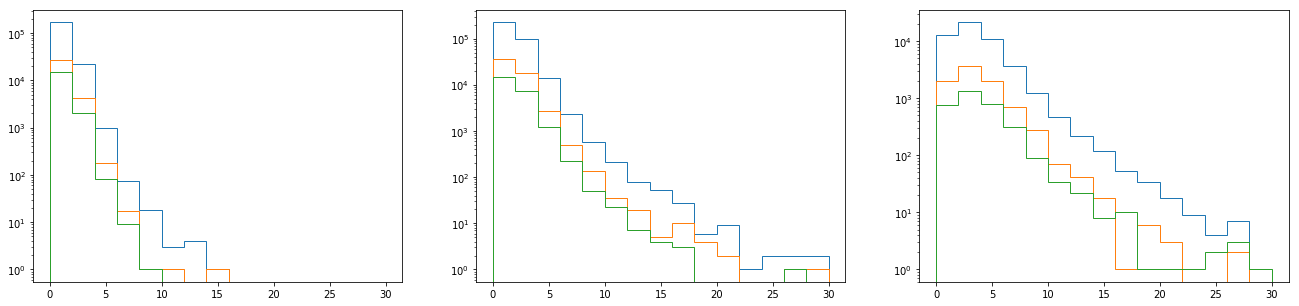

In [22]:
"""#all hadron transverse momenta, in bins of total event multiplicity
dfhadpt = pd.read_csv("input/pThad_Data.csv")

D0_pt_multbin1 = []
D0_pt_multbin2 = []
D0_pt_multbin3 = []
Ds_pt_multbin1 = []
Ds_pt_multbin2 = []
Ds_pt_multbin3 = []
Lc_pt_multbin1 = []
Lc_pt_multbin2 = []
Lc_pt_multbin3 = []

for i in range(len(dfhadpt["pt_had"])):
    if dfhadpt.loc[i,"hadron_pdg"] == 421 :
        if dfhadpt.loc[i,"multiplicity"] < 100 : D0_pt_multbin1.append(dfhadpt.loc[i,"pt_had"])
        elif dfhadpt.loc[i,"multiplicity"] < 300 : D0_pt_multbin2.append(dfhadpt.loc[i,"pt_had"])
        else : D0_pt_multbin3.append(dfhadpt.loc[i,"pt_had"])
    if dfhadpt.loc[i,"hadron_pdg"] == 431 :
        if dfhadpt.loc[i,"multiplicity"] < 100 : Ds_pt_multbin1.append(dfhadpt.loc[i,"pt_had"])
        elif dfhadpt.loc[i,"multiplicity"] < 300 : Ds_pt_multbin2.append(dfhadpt.loc[i,"pt_had"])
        else : Ds_pt_multbin3.append(dfhadpt.loc[i,"pt_had"])
    if dfhadpt.loc[i,"hadron_pdg"] == 4122 :
        if dfhadpt.loc[i,"multiplicity"] < 100 : Lc_pt_multbin1.append(dfhadpt.loc[i,"pt_had"])
        elif dfhadpt.loc[i,"multiplicity"] < 300 : Lc_pt_multbin2.append(dfhadpt.loc[i,"pt_had"])
        else : Lc_pt_multbin3.append(dfhadpt.loc[i,"pt_had"]) 

fig, axes = plt.subplots(1,3,figsize=(22.5,5))
axes[0].hist(D0_pt_multbin1, bins = 15, range = [0,30], histtype="step", label = "D0", fill = False)
axes[0].hist(Ds_pt_multbin1, bins = 15, range = [0,30], histtype="step", label = "Ds", fill = False)
axes[0].hist(Lc_pt_multbin1, bins = 15, range = [0,30], histtype="step", label = "Lc", fill = False)
axes[1].hist(D0_pt_multbin2, bins = 15, range = [0,30], histtype="step", label = "D0", fill = False)
axes[1].hist(Ds_pt_multbin2, bins = 15, range = [0,30], histtype="step", label = "Ds", fill = False)
axes[1].hist(Lc_pt_multbin2, bins = 15, range = [0,30], histtype="step", label = "Lc", fill = False)
axes[2].hist(D0_pt_multbin3, bins = 15, range = [0,30], histtype="step", label = "D0", fill = False)
axes[2].hist(Ds_pt_multbin3, bins = 15, range = [0,30], histtype="step", label = "Ds", fill = False)
axes[2].hist(Lc_pt_multbin3, bins = 15, range = [0,30], histtype="step", label = "Lc", fill = False)
axes[0].set_yscale("log")
axes[1].set_yscale("log")
axes[2].set_yscale("log")"""
